In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Model: MobileNet, 256 batch size, unfroze last 3 blocks, dilation 5px, YOLO confidence 0.5

In [2]:
path = '/Users/josephking/Documents/sponsored_projects/MERGEN/output/MakeModelClassifier/2021-11-09-22h46/logs'
df = pd.read_csv(os.path.join(path, 'predictions.csv'))
ovr_conf_mat = pd.read_csv(os.path.join(path, 'OVR Confusion Matrix.csv')).rename(columns={'Unnamed: 0': 'Make-Model'})
conf_mat = pd.read_csv(os.path.join(path, 'confusion_matrix.csv')).rename(columns={'Unnamed: 0': 'Make-Model'})

## OVR Confusion Matrix

#### Count of images per Make-Model class in test set

In [3]:
counts = df.groupby('true_label')['Acura CL'].count().reset_index().rename(columns={'Acura CL': 'count', 'true_label': 'Make-Model'})

In [4]:
counts['count'].describe()

count    507.000000
mean      34.672584
std       34.216691
min        6.000000
25%       13.000000
50%       23.000000
75%       43.000000
max      236.000000
Name: count, dtype: float64

In [5]:
ovr_conf_mat = ovr_conf_mat.merge(counts, how='left')

In [6]:
ovr_conf_mat = ovr_conf_mat.sort_values(by=['F1'], ascending=False).reset_index(drop=True)
ovr_conf_mat

,Make-Model,TP,FN,FP,TN,Accuracy,Precision,Recall_Sensitivity_TPR,FNR,FPR,Specificity_TNR,F1,count
0,Mercedes-Benz G-Class,46,6,0,17527,0.9997,1.0000,0.8846,0.1154,0.0000,1.0000,0.9388,52
1,Jeep Wrangler,56,8,7,17508,0.9991,0.8889,0.8750,0.1250,0.0004,0.9996,0.8819,64
2,smart fortwo,44,6,15,17514,0.9988,0.7458,0.8800,0.1200,0.0009,0.9991,0.8073,50
3,Mitsubishi Raider,4,2,0,17573,0.9999,1.0000,0.6667,0.3333,0.0000,1.0000,0.8000,6
4,Toyota C-HR,8,3,1,17567,0.9998,0.8889,0.7273,0.2727,0.0001,0.9999,0.8000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Saturn Outlook,0,6,1,17572,0.9996,0.0000,0.0000,1.0000,0.0001,0.9999,0.0000,6
503,Chevrolet Classic,0,6,0,17573,0.9997,NaN,0.0000,1.0000,0.0000,1.0000,0.0000,6
504,Saturn Ion,0,23,0,17556,0.9987,NaN,0.0000,1.0000,0.0000,1.0000,0.0000,23
505,Lincoln MKC,0,11,0,17568,0.9994,NaN,0.0000,1.0000,0.0000,1.0000,0.0000,11


## Make-Model sorted best to worst F1

In [7]:
#plt.close()
#figure(figsize=(5, 180), dpi=80)
#sns.set(font_scale=1.2)
#sns.barplot(data=ovr_conf_mat, x='F1', y='Make-Model')
#plt.xlabel("F1 Statistic", fontsize=20)
#plt.ylabel("Make-Model", fontsize=20)
#plt.title("F1 Statistic, sorted best to worst", fontsize=22)
#plt.tight_layout()
#plt.show()

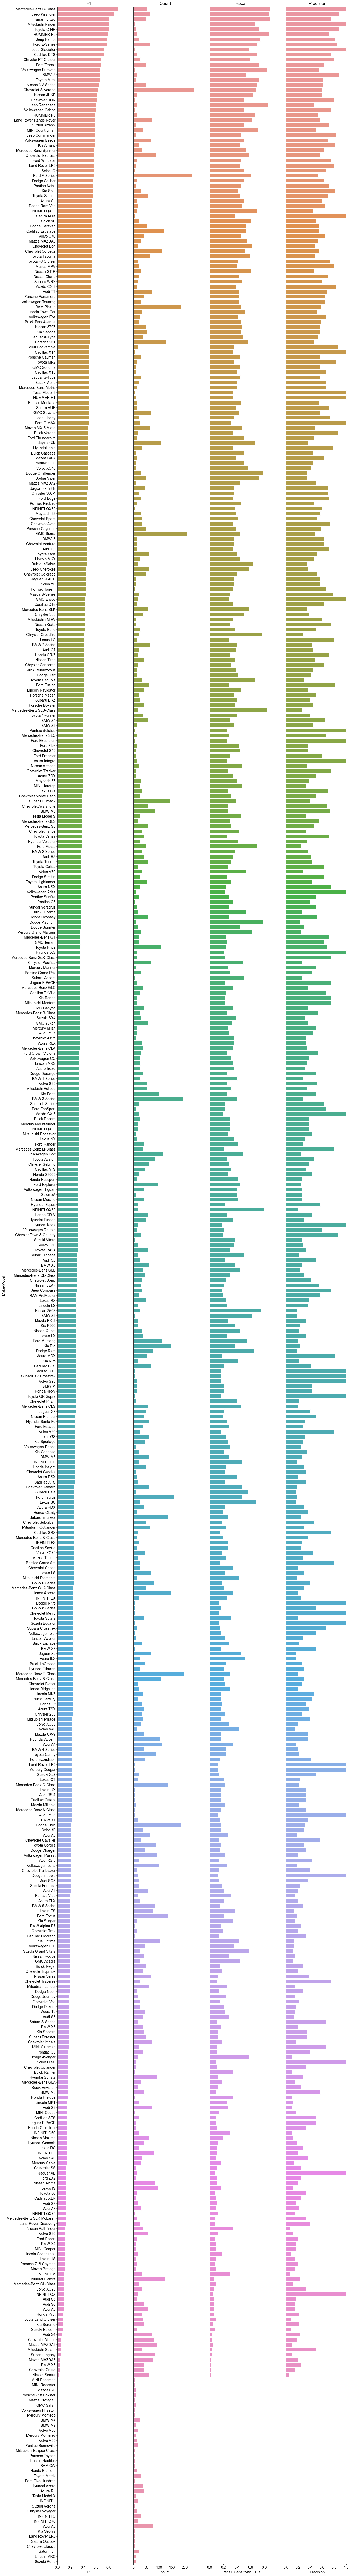

In [8]:
plt.close()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 180), sharey=True)
sns.set(font_scale=1.2)
sns.barplot(data=ovr_conf_mat, x='F1', y='Make-Model', ax=ax1)
ax1.title.set_text('F1')
#ax1.axes.get_xaxis().set_visible(False)
sns.barplot(data=ovr_conf_mat, x='count', y='Make-Model', ax=ax2)
ax2.title.set_text('Count')
ax2.axes.get_yaxis().set_visible(False)
#ax2.axes.get_xaxis().set_visible(False)
sns.barplot(data=ovr_conf_mat, x='Recall_Sensitivity_TPR', y='Make-Model', ax=ax3)
ax3.title.set_text('Recall')
ax3.axes.get_yaxis().set_visible(False)
#ax3.axes.get_xaxis().set_visible(False)
sns.barplot(data=ovr_conf_mat, x='Precision', y='Make-Model', ax=ax4)
ax4.title.set_text('Precision')
ax4.axes.get_yaxis().set_visible(False)
#ax4.axes.get_xaxis().set_visible(False)
plt.show()